In [1]:
import pandas as pd 
df=pd.read_csv(r"/Users/priyankamalavade/Desktop/BRS/data/cleaned_dataset.csv")

In [2]:
df.head()

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time (minutes),Genre,Rank
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313,10080.0,"Over the past three years, Jay Shetty has beco...",654.0,Personal Success,1
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658,615.0,Brought to you by Penguin.,203.0,Meditation,1
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174,10378.0,"In this generation-defining self-help guide, a...",317.0,Personal Success,3
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614,888.0,Brought to you by Penguin.,335.0,Psychology,1
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302,1005.0,"Stop going through life, Start growing throug...",385.0,Literary Essays,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 3025 non-null   object 
 1   Author                    3025 non-null   object 
 2   Rating                    3025 non-null   float64
 3   Number of Reviews         3025 non-null   int64  
 4   Price                     3025 non-null   float64
 5   Description               3025 non-null   object 
 6   Listening Time (minutes)  3025 non-null   float64
 7   Genre                     3025 non-null   object 
 8   Rank                      3025 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 212.8+ KB


# Distribution of ratings across genres

/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_4485/2841519479.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Genre', data=top_genres, palette='viridis')


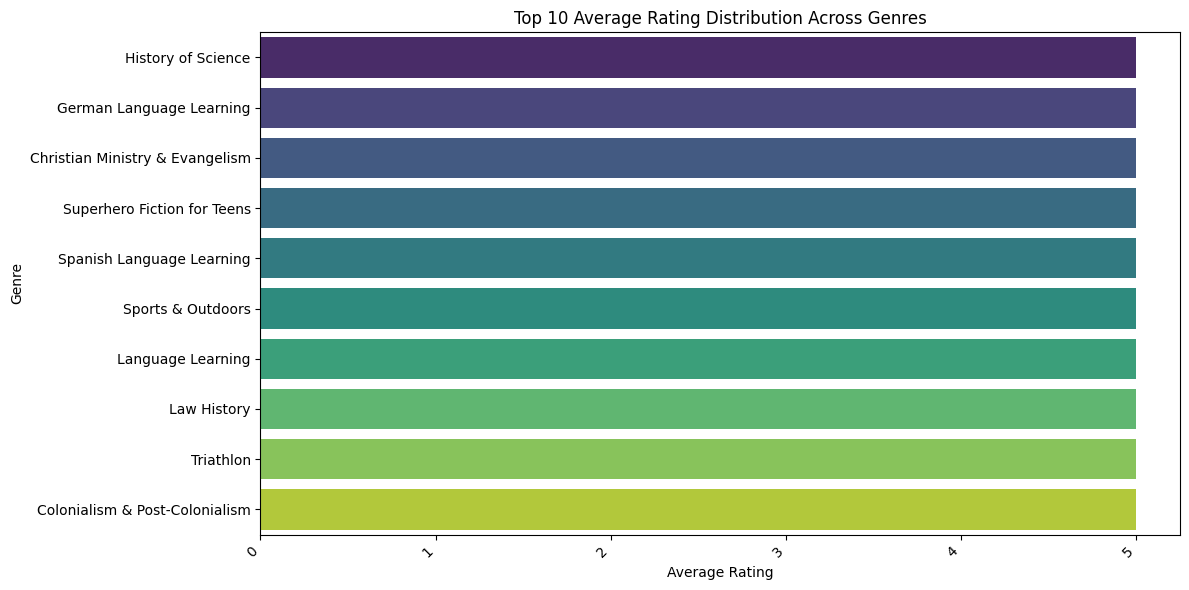

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of ratings across genres
rating_distribution = df.groupby('Genre')['Rating'].mean().reset_index()

# Sort genres by average rating
rating_distribution = rating_distribution.sort_values(by='Rating', ascending=False)

# Select top 10 genres (you can adjust this number based on your dataset)
top_genres = rating_distribution.head(10)

# Plot the distribution using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Genre', data=top_genres, palette='viridis')

# Rotate the genre labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.title('Top 10 Average Rating Distribution Across Genres')
plt.xlabel('Average Rating')
plt.ylabel('Genre')

# Show the plot
plt.tight_layout()  # Ensures everything fits within the figure area
plt.show()


# Most common genres 


/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_4485/3854891157.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')


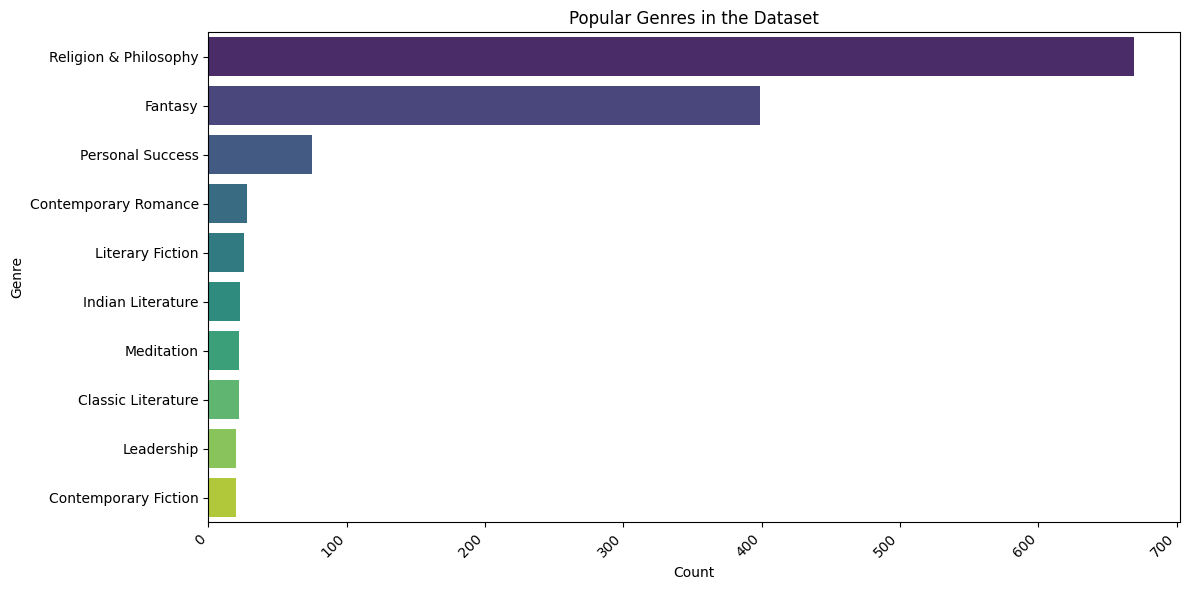

In [6]:
# Count the frequency of each genre
genre_counts = df['Genre'].value_counts().head(10).reset_index()

# Rename columns for clarity
genre_counts.columns = ['Genre', 'Count']

# Plot the bar chart for popular genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')

# Rotate the genre labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.title('Popular Genres in the Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plot
plt.tight_layout()
plt.show()


# Most common authors

/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_4485/465355407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Author', data=author_counts, palette='viridis')


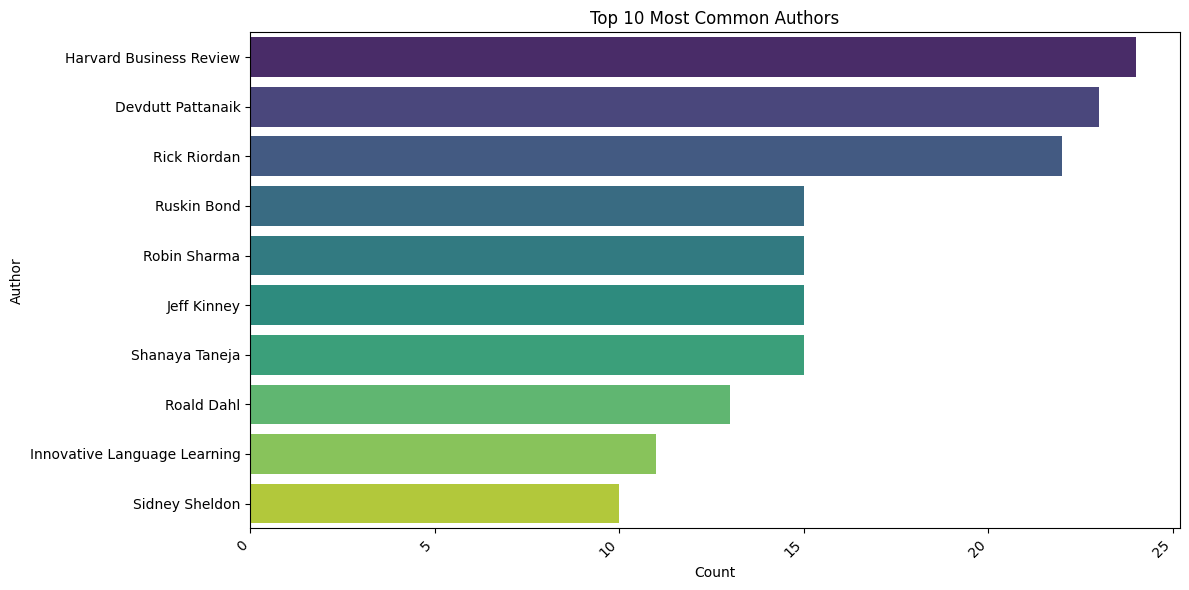

In [7]:
# Count the frequency of each author and select top 10 authors
author_counts = df['Author'].value_counts().head(10).reset_index()

# Rename columns for clarity
author_counts.columns = ['Author', 'Count']

# Plot the most common authors (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Author', data=author_counts, palette='viridis')

# Rotate the author labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.title('Top 10 Most Common Authors')
plt.xlabel('Count')
plt.ylabel('Author')

# Show the plot
plt.tight_layout()
plt.show()


# Relationship between book ratings and review counts


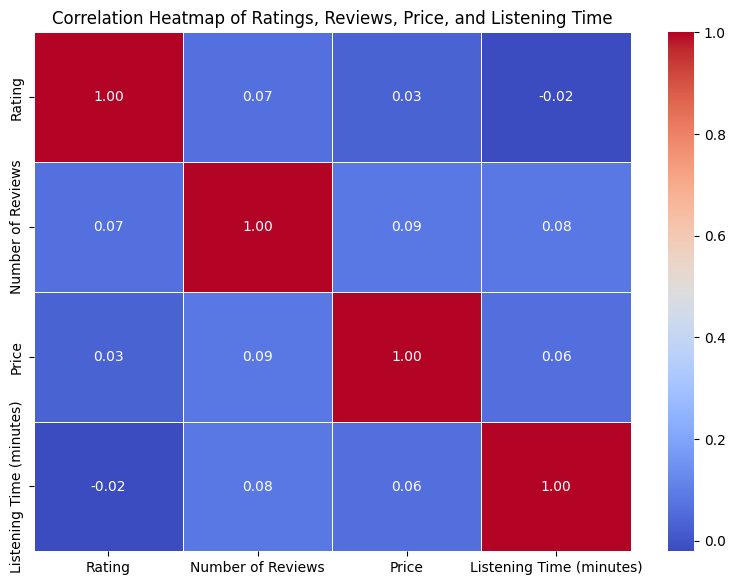

In [8]:
# Select relevant columns for correlation
corr_data = df[['Rating', 'Number of Reviews', 'Price', 'Listening Time (minutes)']]

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Ratings, Reviews, Price, and Listening Time')

# Show the plot
plt.tight_layout()
plt.show()

# Questions to Be Answered

* What are the most popular genres in the dataset?

In [9]:
# Count the frequency of each genre
genre_counts = df['Genre'].value_counts().reset_index()

# Rename columns for clarity
genre_counts.columns = ['Genre', 'Count']

# Show the top 10 most popular genres
top_genres = genre_counts.head(10)
print(top_genres)


                   Genre  Count
0  Religion & Philosophy    669
1                Fantasy    399
2       Personal Success     75
3   Contemporary Romance     28
4       Literary Fiction     26
5      Indian Literature     23
6             Meditation     22
7     Classic Literature     22
8             Leadership     20
9   Contemporary Fiction     20


* Which authors have the highest-rated books?


In [10]:
# Group the data by 'Author' and calculate the average rating for each author
author_ratings = df.groupby('Author')['Rating'].mean().reset_index()

# Sort the authors by their average rating in descending order
highest_rated_authors = author_ratings.sort_values(by='Rating', ascending=False).head(10)

# Display the top 10 authors with the highest-rated books
print(highest_rated_authors)


                 Author  Rating
2042          Vella Day     5.0
691     Gianna Gabriela     5.0
2040         Vasant Lad     5.0
2083   Werner Heidemann     5.0
484         Deva Premal     5.0
478        Dennis Clark     5.0
753         Heidi Lemon     5.0
719   Gregory R. Lanier     5.0
731         H. S. Panag     5.0
380          Cyndi Dale     5.0


* What is the average rating distribution across books?


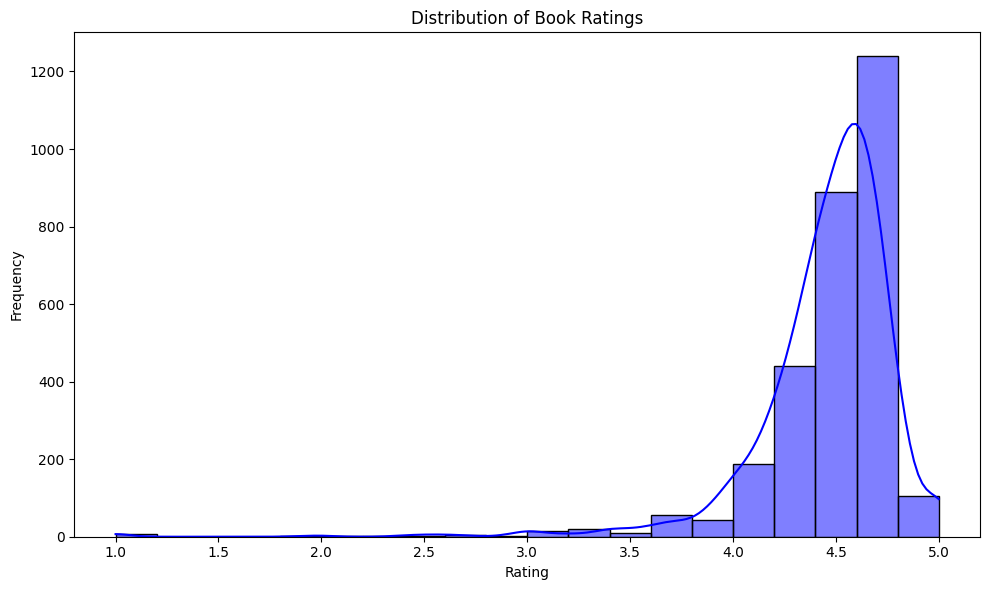

In [11]:
# Plotting the histogram and density plot for the Rating distribution
plt.figure(figsize=(10, 6))

# Histogram with a kernel density estimate (KDE)
sns.histplot(df['Rating'], kde=True, color='blue', bins=20)

# Adding title and labels
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

* How do ratings vary between books with different review counts?


/var/folders/04/gq_w2km90pjc_9np76jkv7q80000gn/T/ipykernel_4485/640961918.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review Count Range', y='Rating', data=df, palette='Set2')


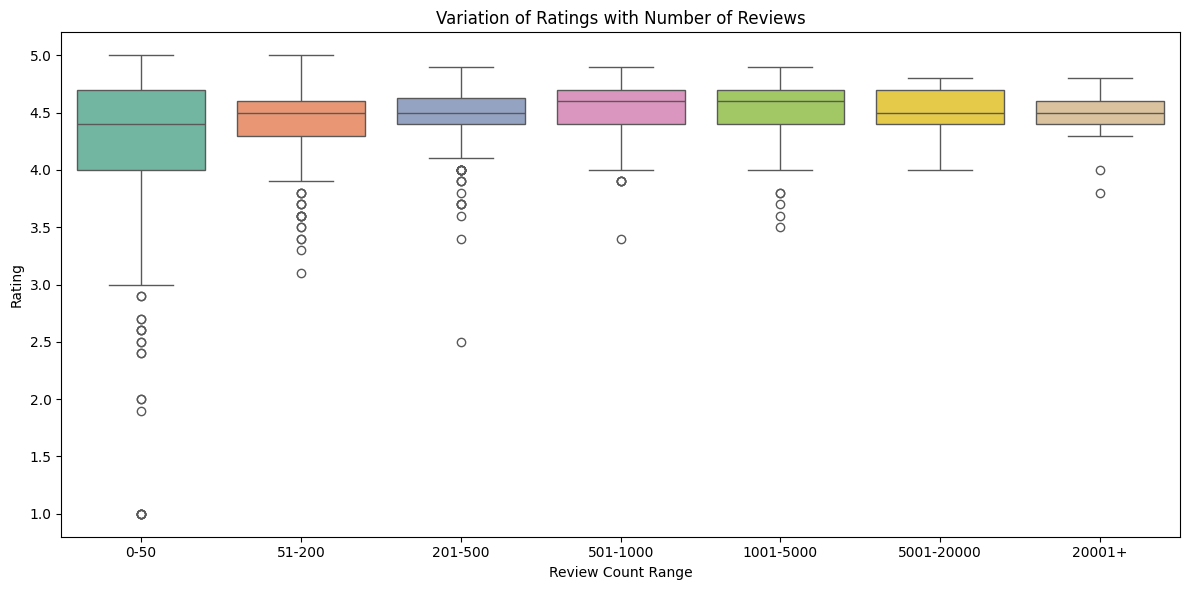

In [12]:
# Creating bins for the number of reviews
bins = [0, 50, 200, 500, 1000, 5000, 20000, df['Number of Reviews'].max()]
labels = ['0-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-20000', '20001+']

# Assigning each book to a bin based on its number of reviews
df['Review Count Range'] = pd.cut(df['Number of Reviews'], bins=bins, labels=labels)

# Box plot to show how ratings vary across different review count ranges
plt.figure(figsize=(12, 6))
sns.boxplot(x='Review Count Range', y='Rating', data=df, palette='Set2')

# Adding title and labels
plt.title('Variation of Ratings with Number of Reviews')
plt.xlabel('Review Count Range')
plt.ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()
